# Prosper Loan Data Exploration

## Data Wrangling 

This document explores the loan data from Prosper and includes ~114,00 entries which includes information pertaining to the borrowers, including income, date, credit, grade from Prosper, and loan amount. 
### What is the structure of the data set? 
The structure of this dataset is listed in full on a <a href="https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0">Google</a> sheet. The aspects as will pertain to us include the following:
* Income Range- ranged in 25k increments 
* Prosper Rating - rated from HR to AA
* Listing Category - what the listing was for
* Credit score upper and lower- aka their credit score at time of listing
* Borrower Rate - the rate of interest on the loan
* Term - the term length in months
* Occupation - listed by borrower 
* Loan Amount - the total amount borrowed 
* Monthly Loan Payment
* Borrower State
* Debt to Income ratio 
#### What am I interested in? 
I am particularly interested to see how income affects the rating and loan amount, as well as to see any particular patterns across state lines. We can see if any of these will be able to better predict loan amount and borrower rate. 

To begin, I am going to look into the data set itself, and see if I immediately see any issues that need to be fixed. 

In [1]:
# I am importing all the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
# loading the data set and aliasing it for convenience
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In the above result, I see a couple things that immediately need to be fixed. There are about 30,000 null results in the prosper rating field, which is going to be one of my primary tools. As such those will need to be dropped. I also see that a couple of dates are not listed as datetime and those will need to fixed if I want to produce any charts related to time. 

In [5]:
# this removes any null items in the category and returns the full data set corrected
loans = loans.loc[loans['ProsperScore'].isnull()==False]

In [6]:
# we see our data set has gone down by the appropriate amount 
loans.shape

(84853, 81)

In [7]:
loans['DateCreditPulled'].head()

1    2014-02-27 08:28:14
3    2012-10-22 11:02:32
4    2013-09-14 18:38:44
5    2013-12-14 08:26:40
6    2013-04-12 09:52:53
Name: DateCreditPulled, dtype: object

In [8]:
# this is correcting this field to datetime 
loans['DateCreditPulled'] = pd.to_datetime(loans['DateCreditPulled'], format="%Y-%m-%d %H:%M:%S")

In [9]:
# verifying that is has worked 
loans['DateCreditPulled'].info()

<class 'pandas.core.series.Series'>
Int64Index: 84853 entries, 1 to 113936
Series name: DateCreditPulled
Non-Null Count  Dtype         
--------------  -----         
84853 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.3 MB


In [10]:
# i see in this one that this category is a lot messier than the previous. we only need year and month for this particular one
loans['ListingCreationDate'].head()

1    2014-02-27 08:28:07.900000000
3    2012-10-22 11:02:35.010000000
4    2013-09-14 18:38:39.097000000
5    2013-12-14 08:26:37.093000000
6    2013-04-12 09:52:56.147000000
Name: ListingCreationDate, dtype: object

In [11]:
#updated column so transition to date time is easier 
loans['ListingCreationDate']=loans['ListingCreationDate'].str[:-22]

In [12]:
loans['ListingCreationDate'] = pd.to_datetime(loans['ListingCreationDate'], format="%Y-%m")

In [13]:
# checking all the type of columns 
loans['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [14]:
loans['IncomeRange'].value_counts()

$50,000-74,999    25627
$25,000-49,999    24175
$100,000+         15205
$75,000-99,999    14498
$1-24,999          4654
Not employed        649
$0                   45
Name: IncomeRange, dtype: int64

In [15]:
# i am making sure that when I want to create a chart, it will automatically order these categories appropriately 
type_dict ={
    "IncomeRange":["Not employed", "$0", "$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+"], 
    "ProsperRating (Alpha)":["HR", "E", "D", "C", "B", "A", "AA"]
}

In [16]:
for col in type_dict:
    loans[col] = loans[col].astype("category")
    loans[col] = loans[col].cat.set_categories(
        type_dict[col], ordered=True)

In [17]:
# we need to create a column that has one number for credit score instead of a grade 
loans['CreditScore']=(loans['CreditScoreRangeLower'] + loans['CreditScoreRangeUpper'])/2

In [18]:
loans['CreditScore'].value_counts()

669.5    14133
689.5    14019
709.5    13610
729.5    11034
649.5     8849
749.5     7871
769.5     5253
789.5     3705
809.5     2107
629.5     1653
829.5     1042
609.5     1040
849.5      398
869.5      122
889.5       17
Name: CreditScore, dtype: int64

# Univariate Exploration 

## Loan Amount 

### What is the distribution of loan amounts? 

I wonder whether they are centralized around one mean or if there are 'steps'. 

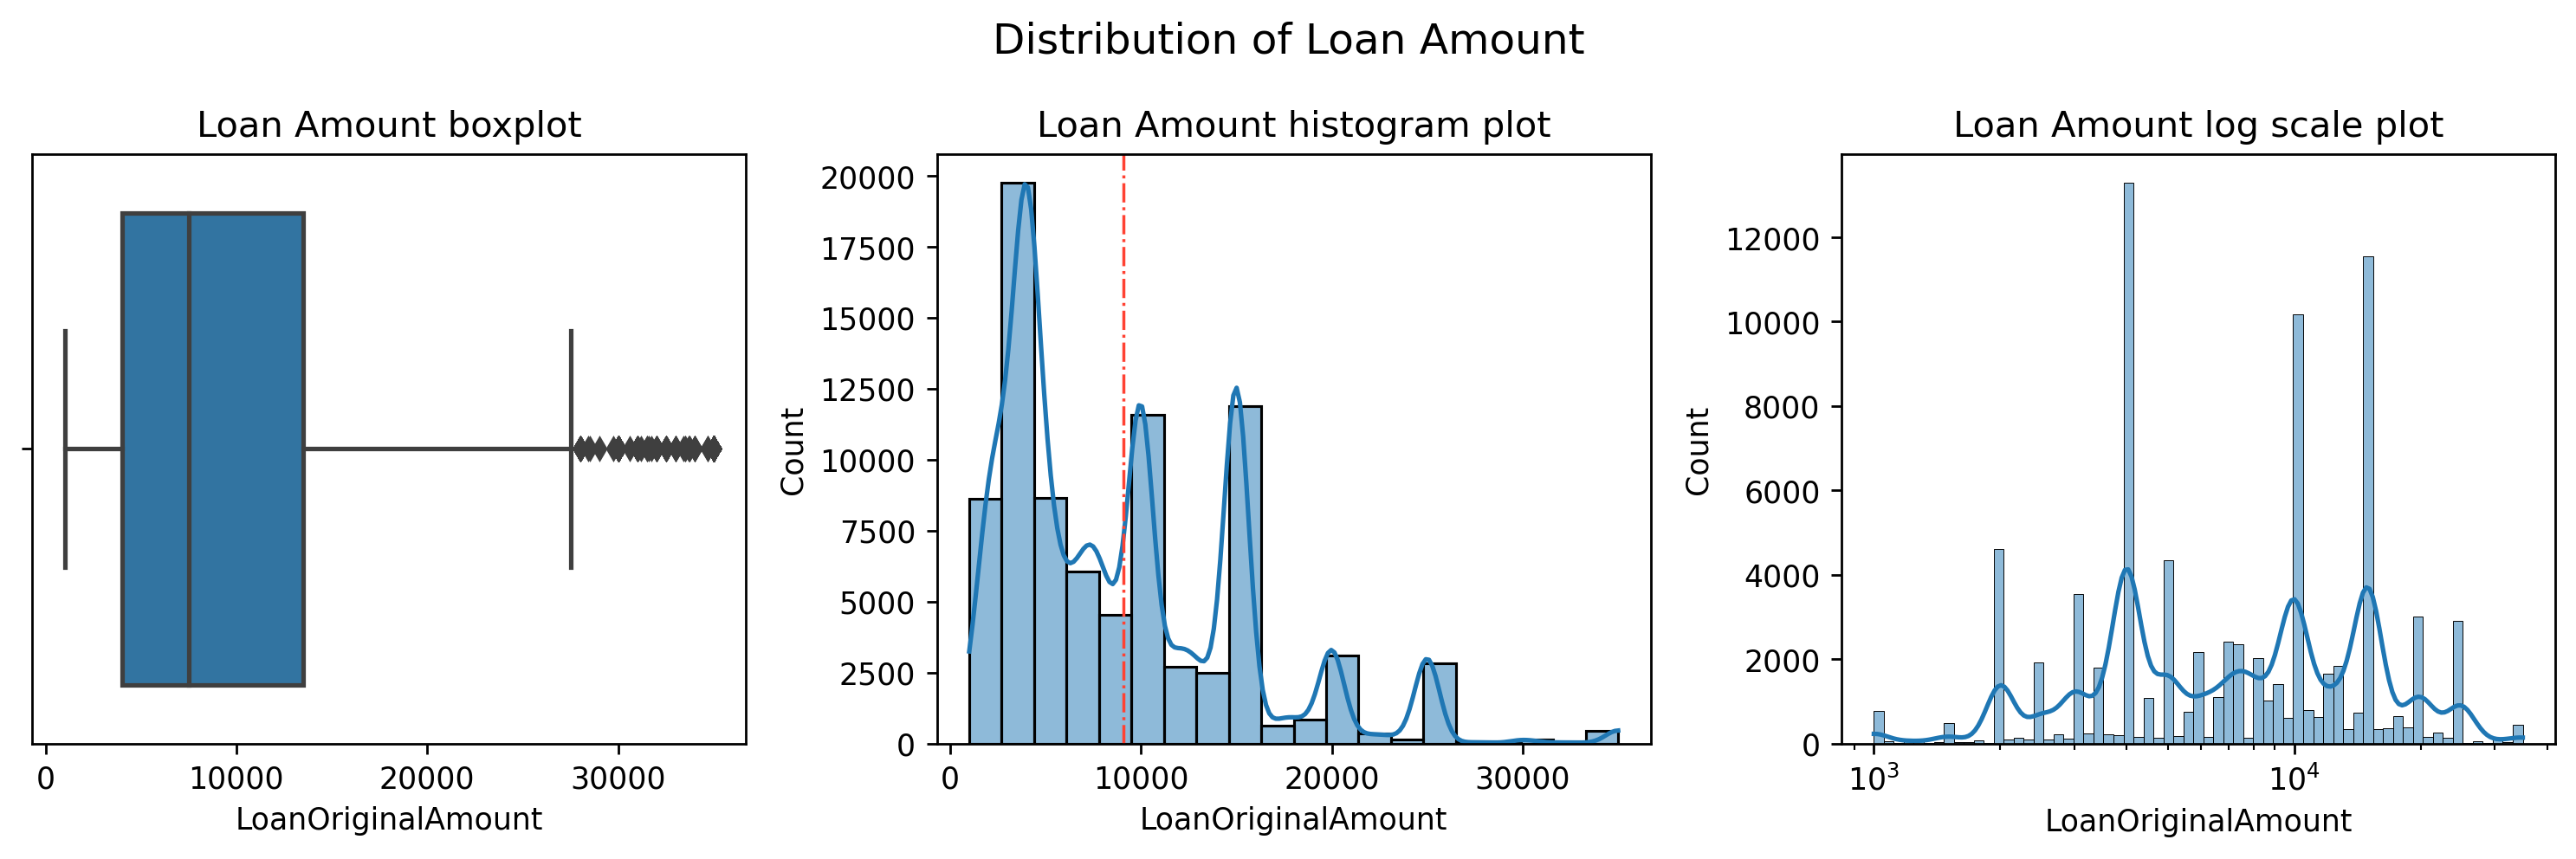

In [19]:
fig, axes = plt.subplots(1, 3, figsize=[12, 4], dpi=250)
#i need a title and to make three plots                         
fig.suptitle('Distribution of Loan Amount', fontsize=14)
                         
sns.boxplot(x='LoanOriginalAmount', data=loans, ax=axes[0])
sns.histplot(x='LoanOriginalAmount', data=loans, kde=True, ax=axes[1], bins=20)
sns.histplot(x='LoanOriginalAmount', data=loans, kde=True, log_scale=True, ax=axes[2])
 # i want to show the mean loan amount on the histogram to better reference the box plot                        
mean_loan_amount = np.round(loans['LoanOriginalAmount'].mean())
axes[1].axvline(mean_loan_amount, color="#FF4233", linestyle="-.", linewidth=1)
 # i want to title the individual plots                         
axes[2].set_title("Loan Amount log scale plot")
axes[1].set_title("Loan Amount histogram plot")
axes[0].set_title("Loan Amount boxplot")

plt.tight_layout()

* from the boxplot we see that there are several outliers in the loan amount, with most of the grouping between 50-140k. 
* in the histogram/kde, we see that the mean is nearly 100k, with spikes presumably around 50, 100, and 150k. 
* the log scale also shows these three spikes. 

## Borrower Rate 

### What is the distribution of interest rates? 

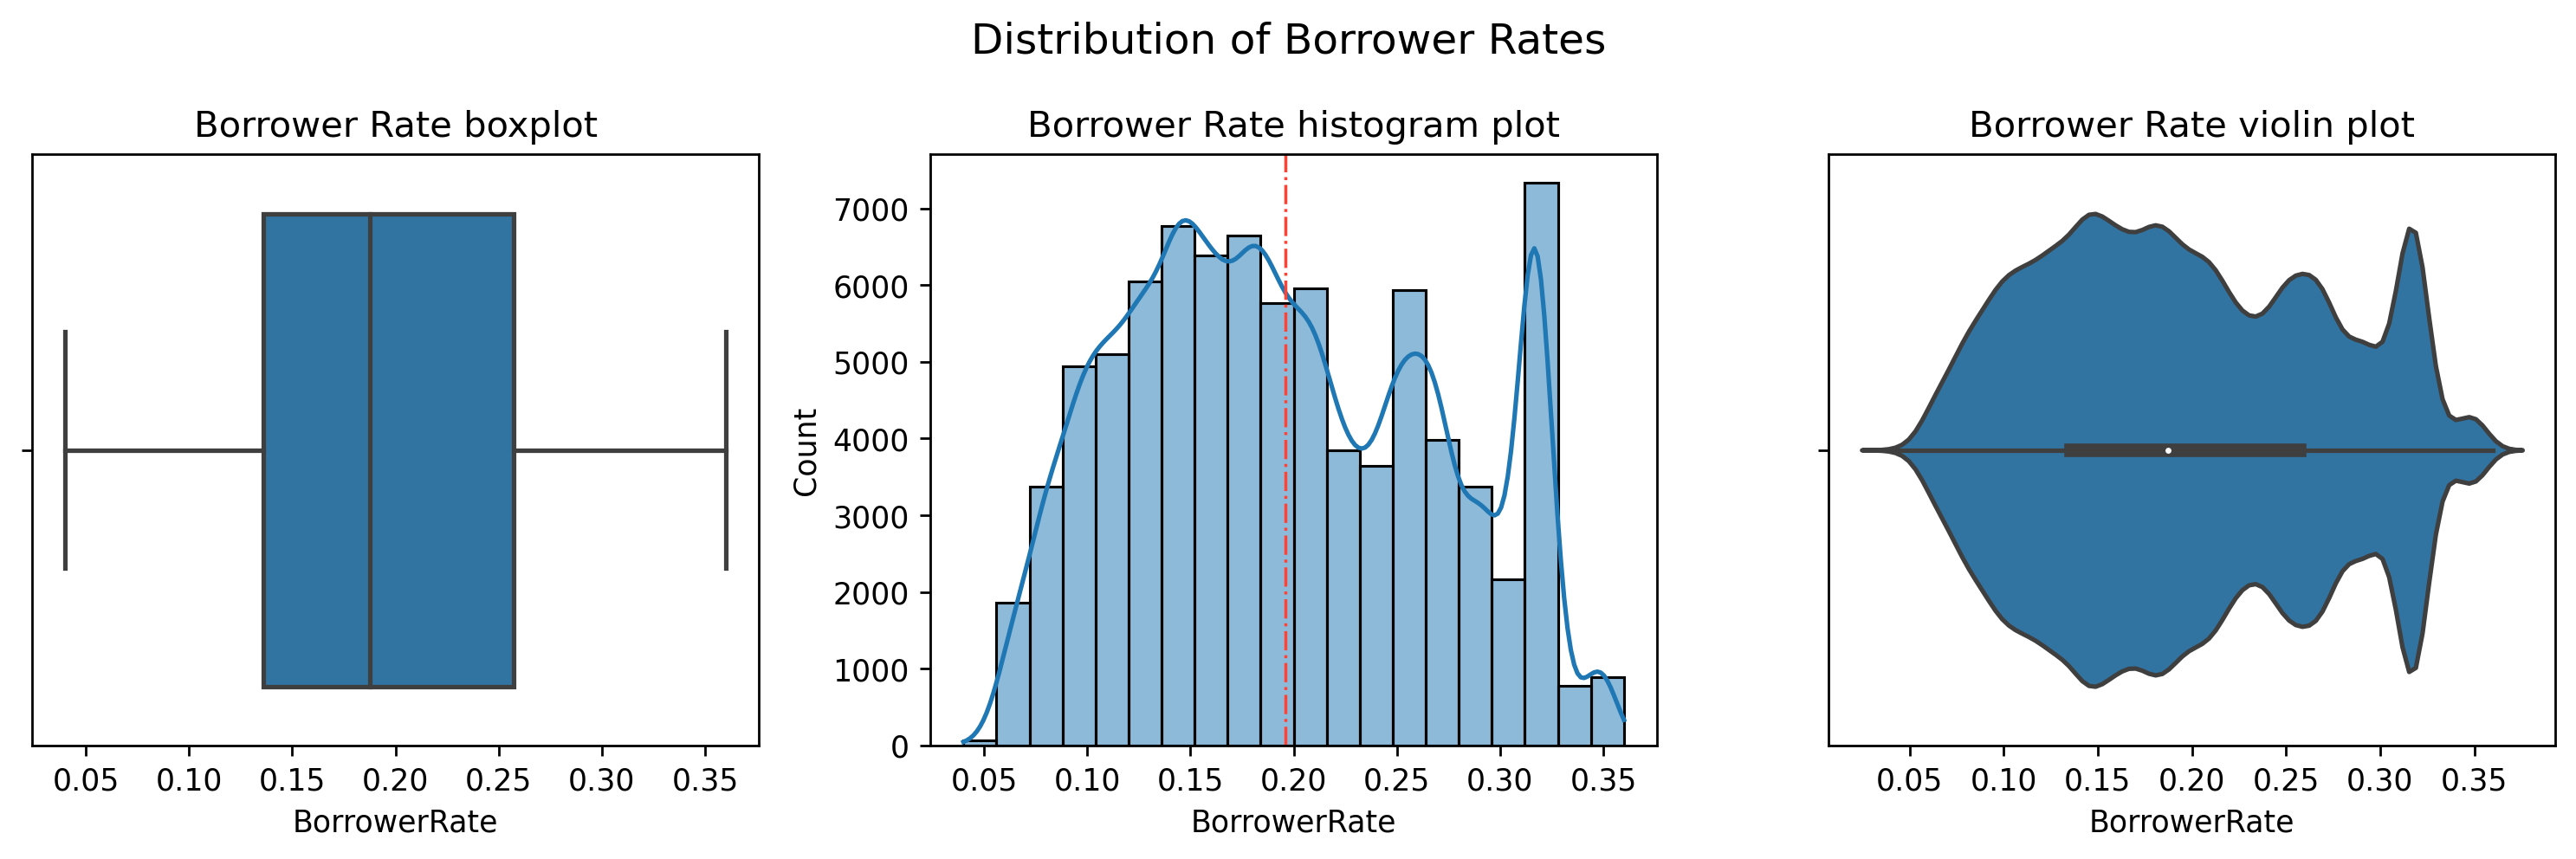

In [20]:
fig, axes = plt.subplots(1, 3, figsize=[12, 4], dpi=250)
#i need a title and to make three plots                         
fig.suptitle('Distribution of Borrower Rates', fontsize=14)
                         
sns.boxplot(x='BorrowerRate', data=loans, ax=axes[0])
sns.histplot(x='BorrowerRate', data=loans, kde=True, ax=axes[1], bins=20)
sns.violinplot(x='BorrowerRate', data=loans, ax=axes[2])
 # i want to show the mean loan amount on the histogram to better reference the box plot                        
mean_borrower_amount = np.round(loans['BorrowerRate'].mean(), 3)
axes[1].axvline(mean_borrower_amount, color="#FF4233", linestyle="-.", linewidth=1)
 # i want to title the individual plots                         
axes[2].set_title("Borrower Rate violin plot")
axes[1].set_title("Borrower Rate histogram plot")
axes[0].set_title("Borrower Rate boxplot")

plt.tight_layout()

* we see in the box plot there are no outliers in the data, which is great as that means there are hard cutoffs 
* The histogram shows up this is relatively grouped, with most being focused around .15 and the other two spikes happening at ~.25 and .32
* Violin plot again shows most of the grouping around .15 and then a small spike and a very large spike  

# Borrower Dimensions

## What are the distributions of the categorical variables? 

<Figure size 576x360 with 0 Axes>

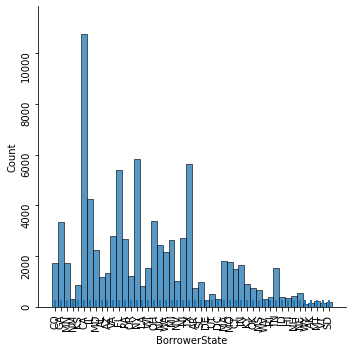

In [21]:
plt.figure(figsize=(8,5))
sns.displot(loans.BorrowerState, rug=True, kde_kws={"lw": 5}, rug_kws={'lw': 2} )
plt.tick_params(labelrotation=90)
plt.tight_layout()

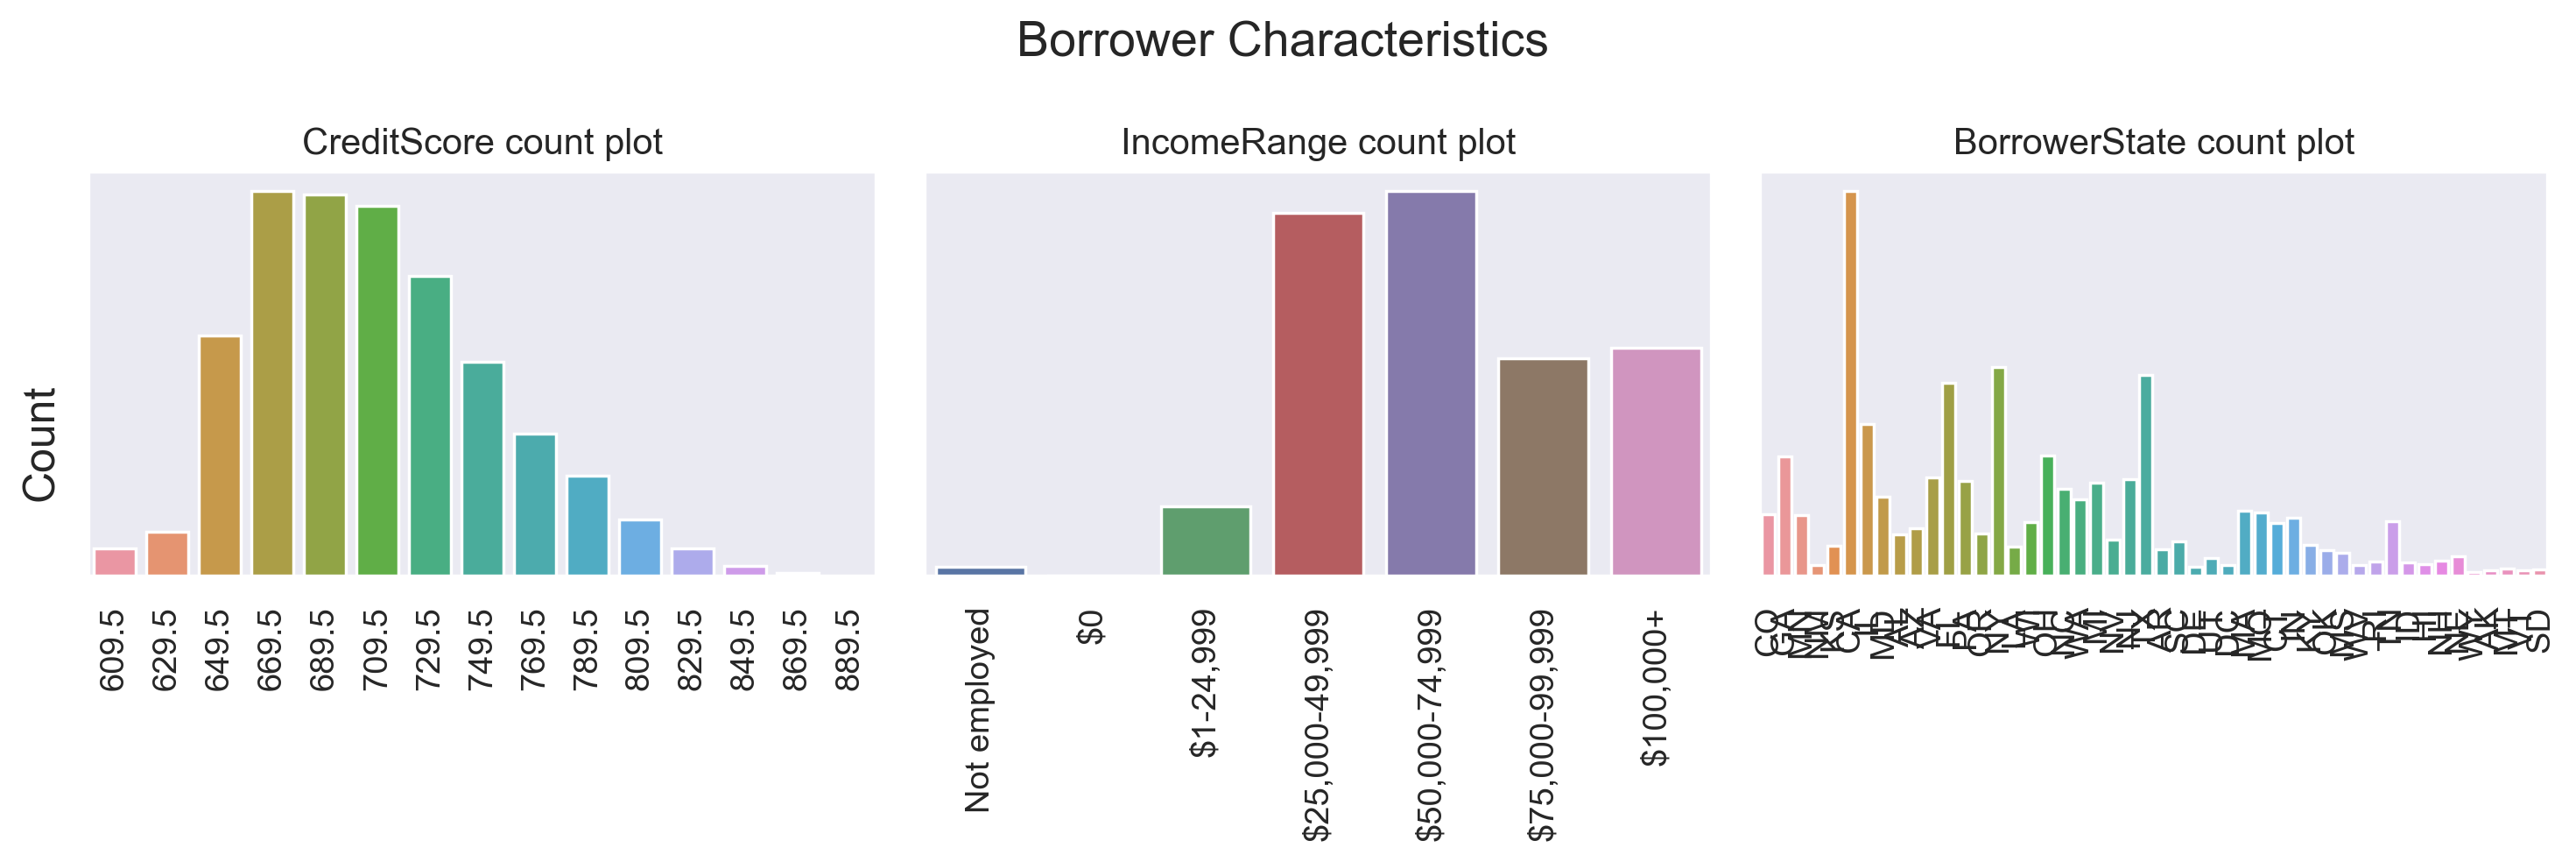

In [22]:
# i want count plots of all the categorical data 
sns.set(font_scale=1)
fig, axes = plt.subplots(1, 3, figsize=(12,4), dpi=250)
fig.suptitle("Borrower Characteristics", fontsize=16)
fig.supylabel("Count")
# i am making a for loop to recreate the countplots and setting it so they are identical 
characteristics = ["CreditScore", "IncomeRange", "BorrowerState"]
for idx, character in enumerate(characteristics):
    sns.countplot(data=loans, x=character, ax=axes[idx])

    axes[idx].set_xlabel("")
    axes[idx].set_ylabel("")
    
    axes[idx].set_title(f"{character} count plot")
    axes[idx].tick_params(axis="x", labelrotation=90)
    
    axes[idx].set_yticks([])
    axes[idx].set(yticklabels=[])
plt.tight_layout()

* we have several takeaways here. for the credit score, we see most are actually in the upper 600s, and it is a unimodal plot
* for the income range, we have almost no responses for $0, which makes sense. and most of the responses are between 25-75k. 
* we see for the states that there is one with far and away the most, with about 5 others that are also pretty high. 

## Prosper Rating

Text(0.5, 1.0, 'Count of Ratings')

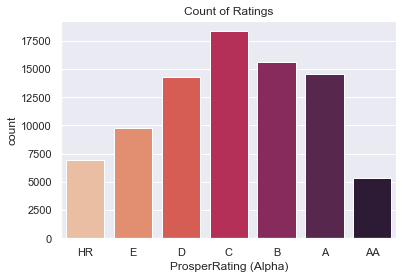

In [23]:
sns.countplot(x='ProsperRating (Alpha)', data=loans, palette='rocket_r')
plt.title("Count of Ratings")

* As we can see the most common rating is a c, with a clear unimodal gaussian trend. This indicates that most borrowers would be categorized as somewhat risky. It will be interesting to see how that interacts with income and state and loan amount. 

## Overall Impressions

* We can see that the loan amount is right-skewed with several outliers borrowing much larger amounts. We also see that there are specific jumps at 50k marks, which makes sense. 
* The borrower rate seems uniform and unimodal, as does credit score and prosper rating, so these all seem to work together. 
* Income range has two higher categories and two medium categories, with the bottom three also being the least likely. 

* I did not reconfigure the data after these findings, are the outliers were only found in loan amount, which may be interesting to look at later on. 

# Bivariate Exploration 

To begin, I want to see how income is related to the prosper rating. I also want to see if borrower state has any bearings on interest rate. 

### Does state lived in affect borrower interest rate? 

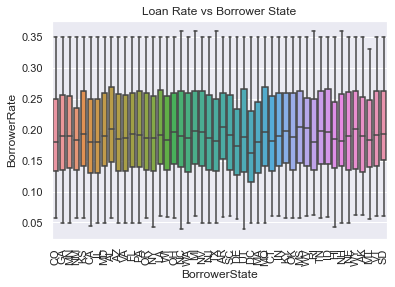

In [24]:
ax = sns.boxplot(data=loans, x="BorrowerState", y="BorrowerRate")
plt.title("Loan Rate vs Borrower State")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

Unfortunately, as we can see here, it stays relatively the same across all states, therefore we can dismiss this from further investigation. 

## Does income range differ across various prosper scores? 

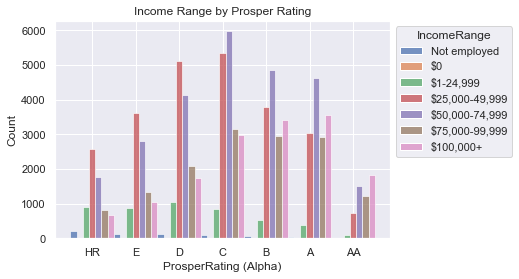

In [25]:
ax = sns.histplot(binwidth=1,
            x='ProsperRating (Alpha)',
            hue='IncomeRange',
            data=loans,
            stat="count",
            multiple="dodge")
plt.title("Income Range by Prosper Rating")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

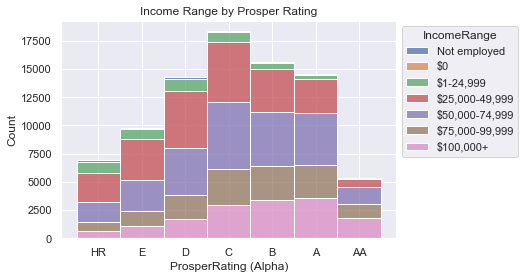

In [26]:
ax= sns.histplot(binwidth=.5, hue='IncomeRange', x="ProsperRating (Alpha)", data=loans, stat="count", multiple="stack")
plt.title("Income Range by Prosper Rating")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In these charts, I see that as the ratings get higher, the income range becomes more focused on the higher ranges, with AA not having any of the bottom three. As you go up in income, you are more likely to go up in rating. 

## Is there a relationship between credit score and interest rate? 

C:\Users\14693\anaconda3\envs\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


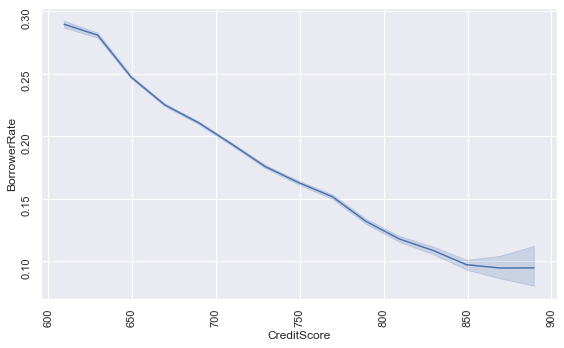

In [37]:
def line_plot(data, x, y):
    "[x] vs. [y]"
    plt.figure(figsize=(8,5))
    """plotting a typical line graph with mean of each option on x axis """
    sns.lineplot(data[x], data[y], estimator='mean')
    plt.tick_params(labelrotation=90)
    plt.tight_layout()
    
line_plot(data=loans, x="CreditScore", y="BorrowerRate" )

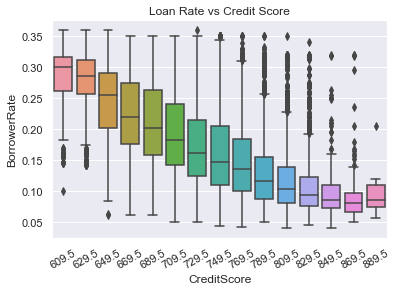

In [28]:
ax = sns.boxplot(data=loans, x="CreditScore", y="BorrowerRate")
plt.title("Loan Rate vs Credit Score")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

<AxesSubplot:xlabel='CreditScore', ylabel='BorrowerRate'>

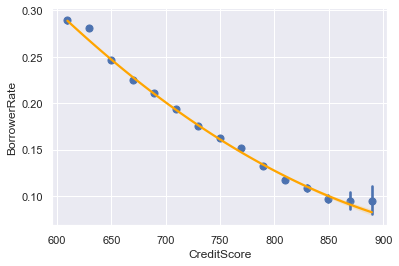

In [29]:
sns.regplot(data=loans, x="CreditScore", y="BorrowerRate", x_estimator=np.mean, order=2, line_kws={'color':'orange'})

We can see here a very clear relationship between credit score and borrow rate, with the rate of the loan going down as your credit score goes up. 

In [30]:
numeric = ["BorrowerRate", "LoanOriginalAmount", "CreditScore", "ProsperRating (numeric)", "Term", "DebtToIncomeRatio"]

### What is the correlation between the main numeric variables? 

<AxesSubplot:>

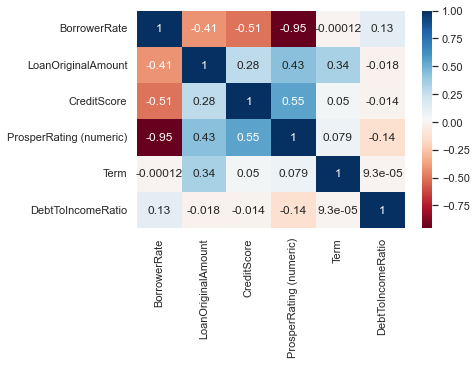

In [31]:
sns.heatmap(loans[numeric].corr(), annot=True, cmap='RdBu')

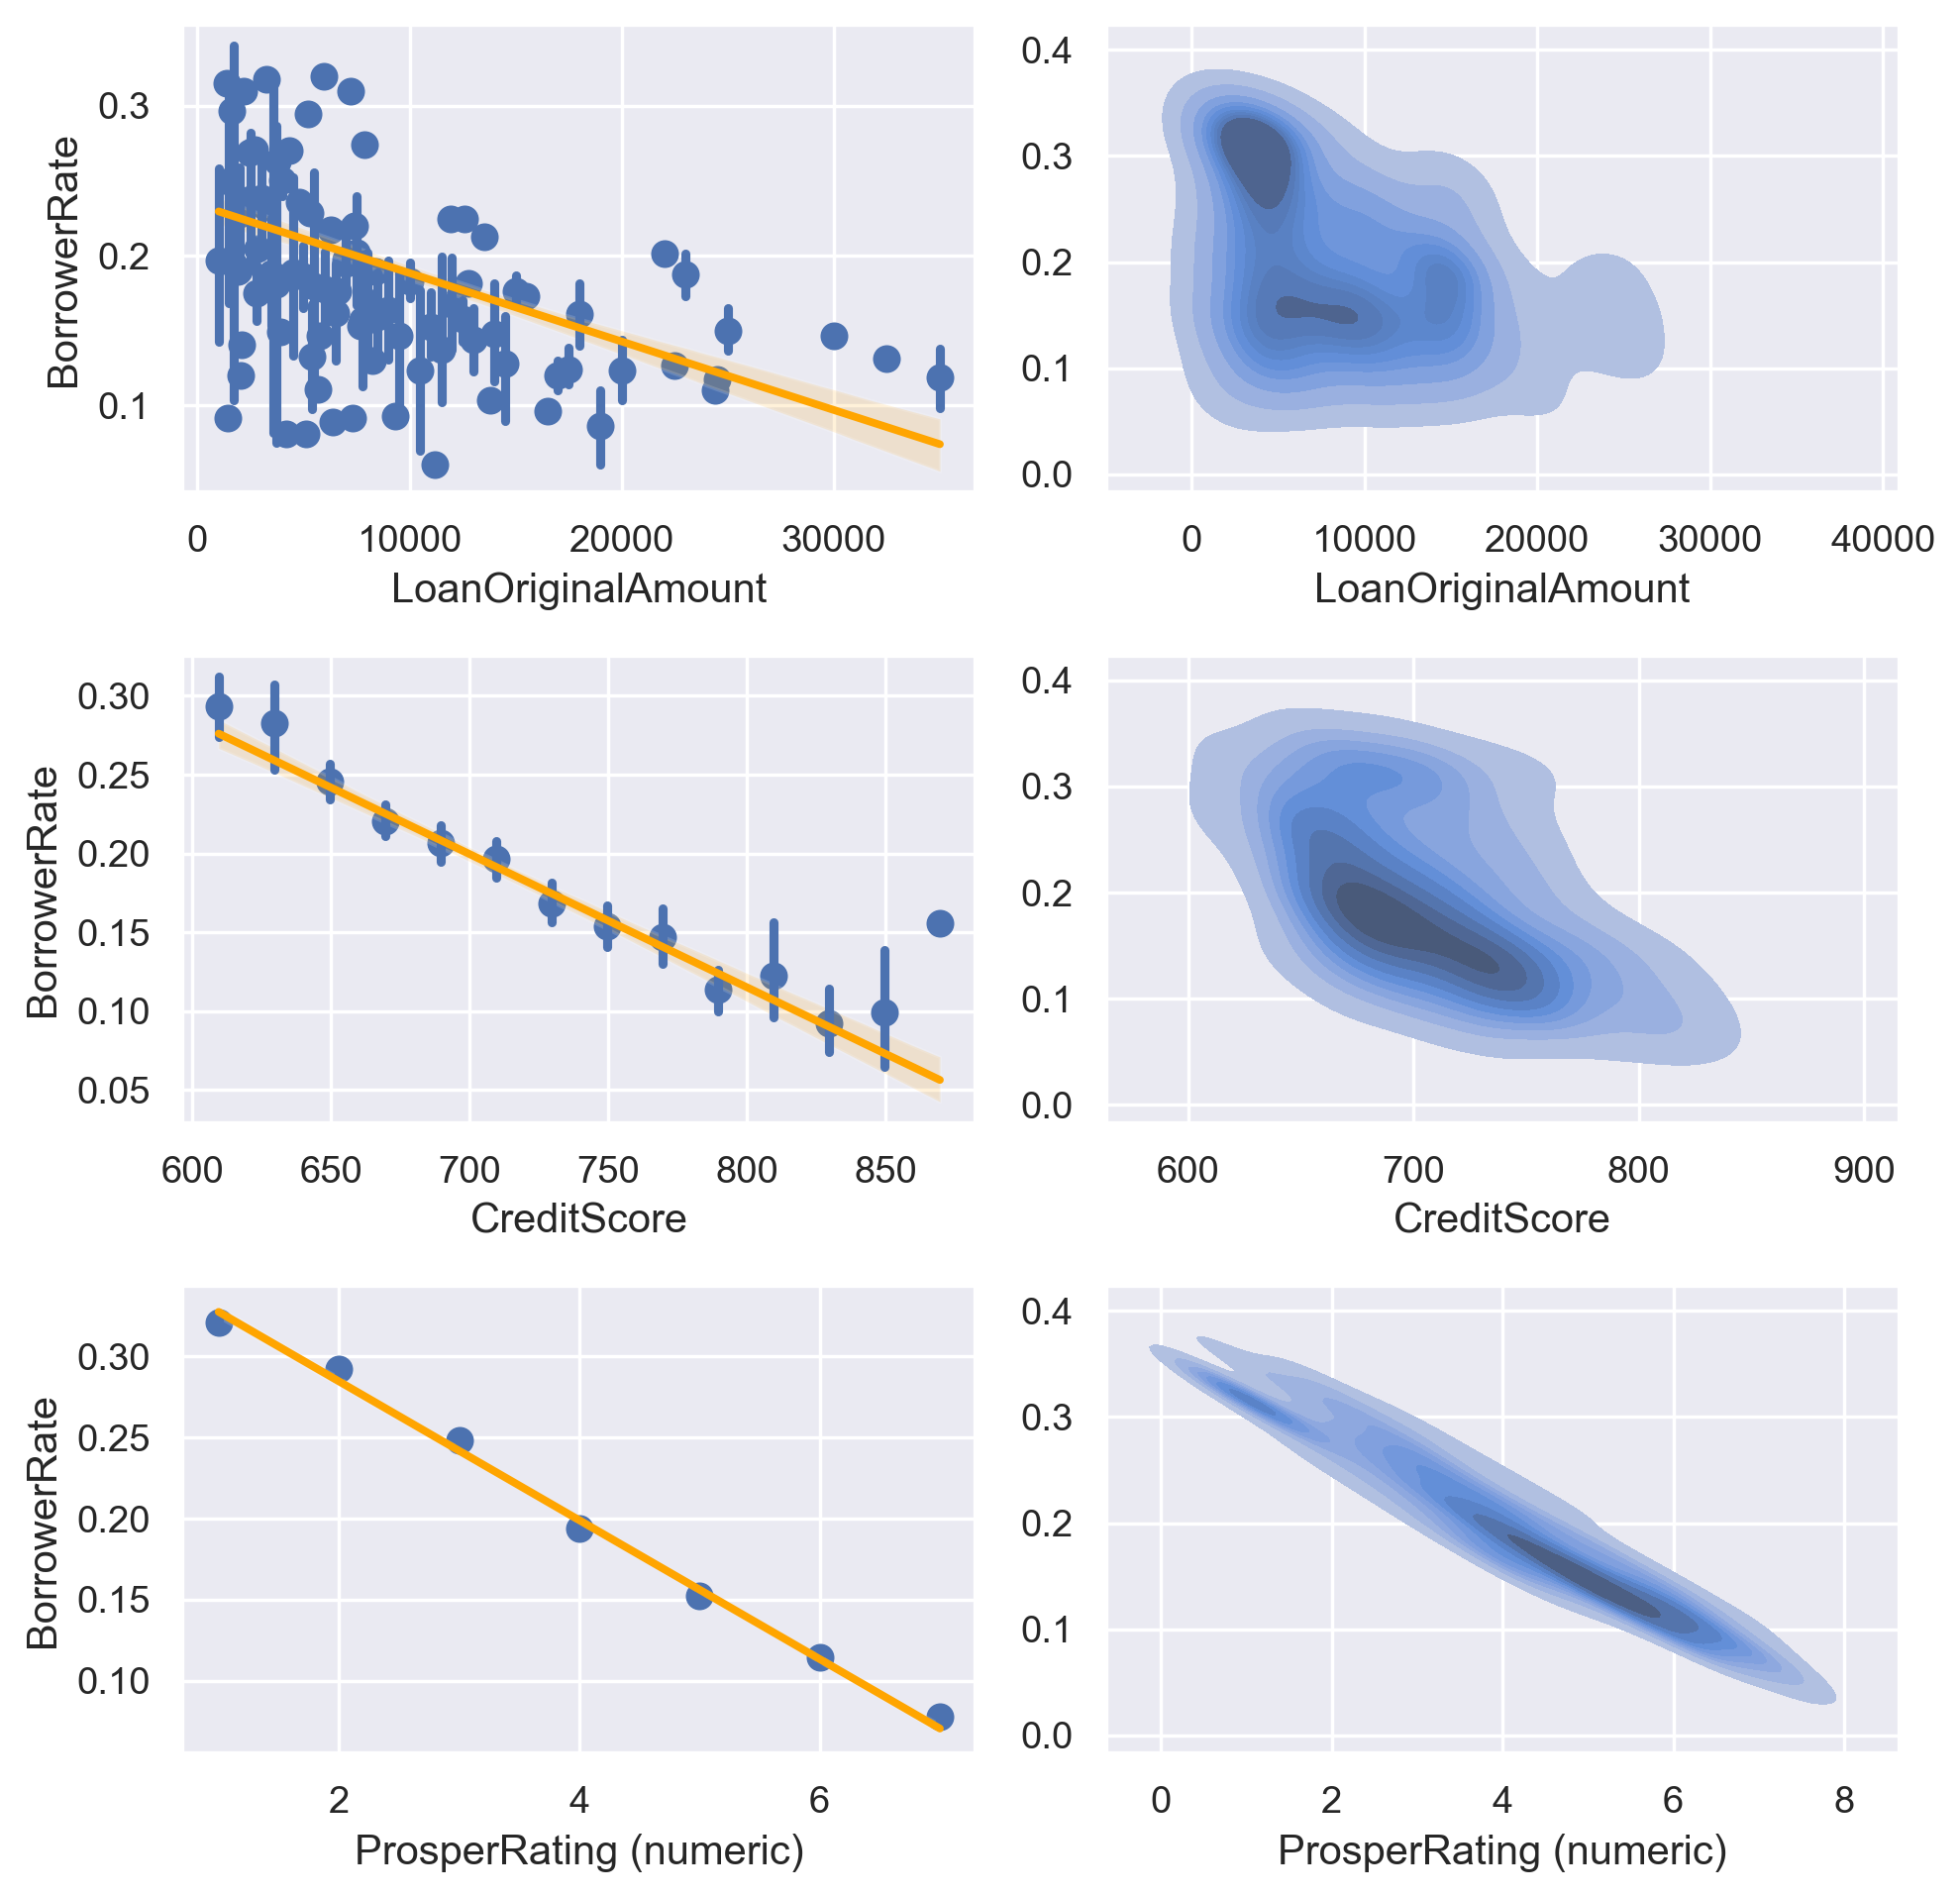

In [32]:
numeric2 = ["LoanOriginalAmount", "CreditScore", "ProsperRating (numeric)"]
loan_samp = loans.sample(n=800, replace=False)
fig, axes = plt.subplots(3, 2, figsize=[8, 8], dpi=250)
fig.suptitle("", fontsize=16)

"""creating a for loop to create all 6 charts at once """
for idx, col in enumerate(numeric2):
    sns.regplot(data=loan_samp, x=col, y="BorrowerRate", ax=axes[idx][0], x_estimator=np.mean, line_kws={'color':'orange'})
    sns.kdeplot(data=loan_samp, x=col, y="BorrowerRate", ax=axes[idx][1], shade=True)
    axes[idx][1].set_ylabel("")
plt.tight_layout()

As we can see Borrow rate is incredibly correlated with each of our other variables. 

## Overall Impression 
* The relationship between borrower state and the other facets was non existent. Even though there are large gaps in the amount of loans given by state, we do not see any relative difference in how the states are treated. 
* However, we do see a relationship between income range and prosper rating, where as the income goes up, the likelihood of a higher rating also seems to go up. 
* We also see a significant relationship between borrower rate (the interest given on the loan) and a number of other categories, such as the prosper rating, credit score, and the original loan amount. 
* Unexpectedly, we did not see a relationship between debt to income ratio or term time to the other numerical categories, so these will not be explored further at this time. 


# Multivariate Exploration 

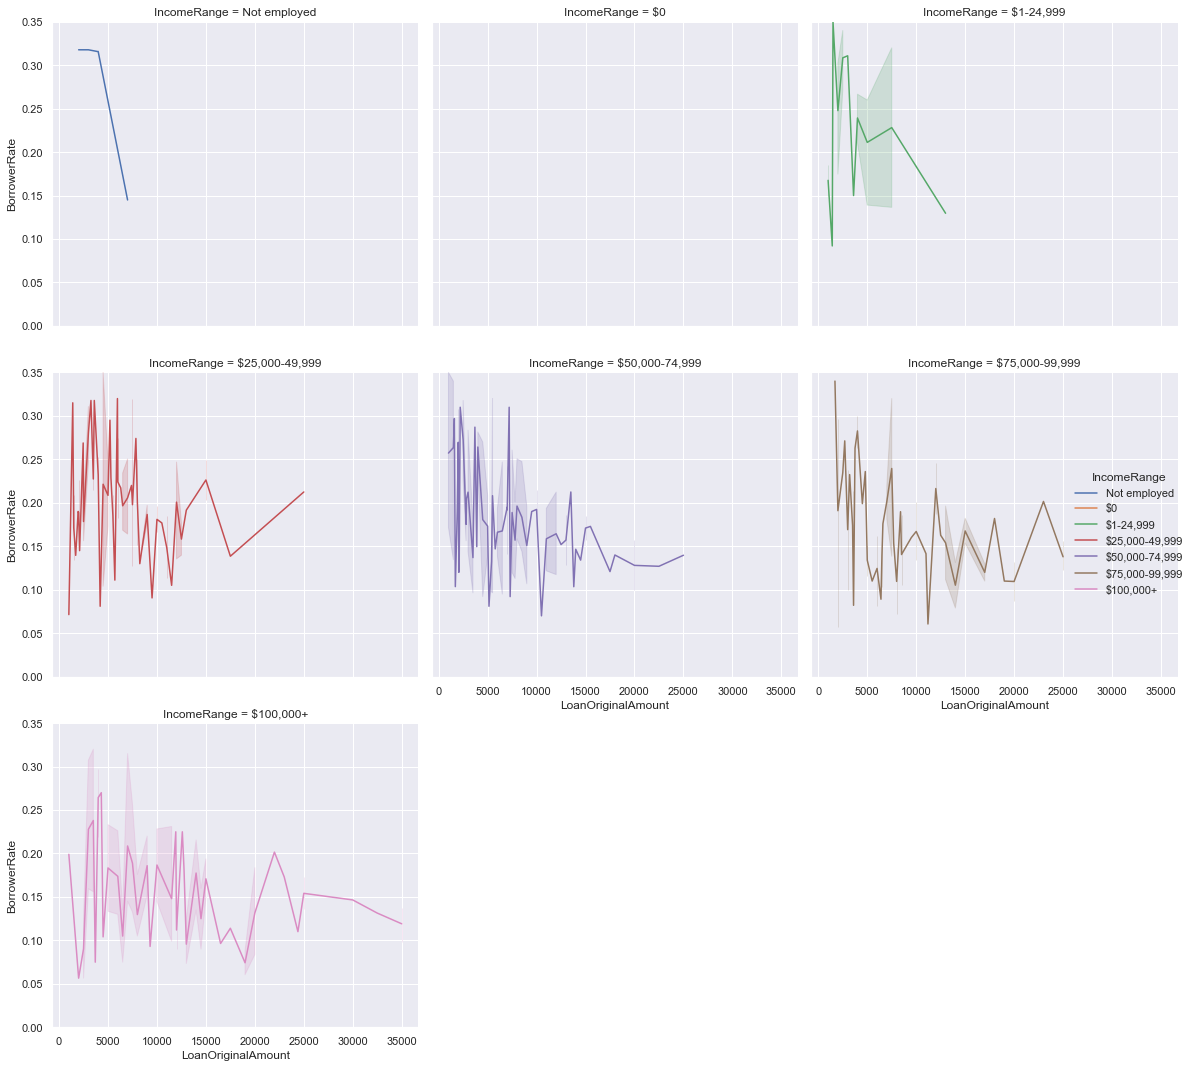

In [33]:
g = sns.relplot(x='LoanOriginalAmount', y='BorrowerRate', 
                data=loan_samp,
                col='IncomeRange',
                hue='IncomeRange',
                facet_kws={'ylim':(0, .35)},
                kind='line', col_wrap=3
               )
plt.tight_layout();

Through these charts we can see that Loan amount has much more variety the more income you have, and that even at smaller loan rates the higher income earners receive a better loan rate. We also see that throughout each graph, the more that is borrowed, the better your loan rate. 

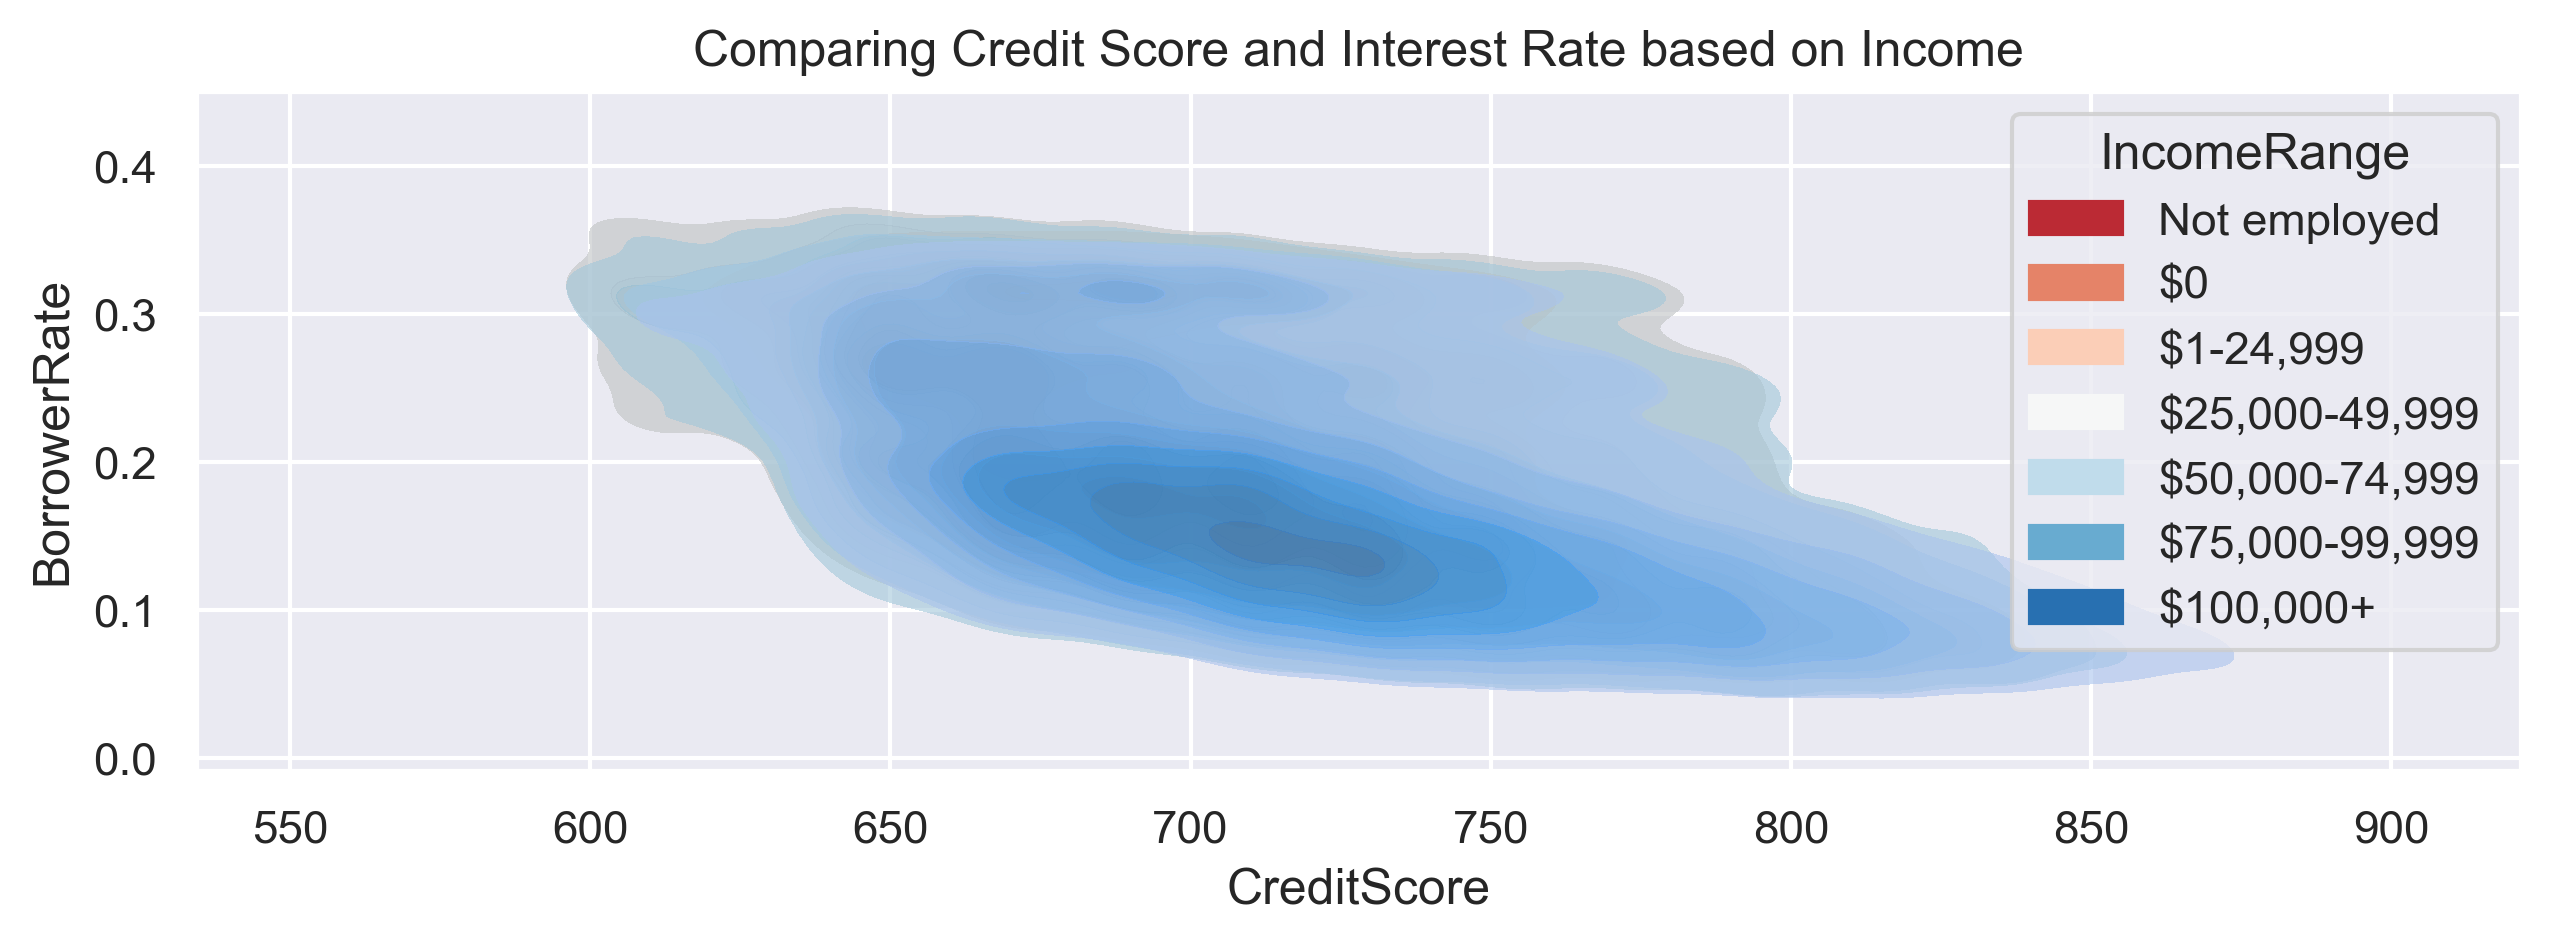

In [34]:
fig, ax = plt.subplots(1, 1, figsize=[10, 3], dpi=300)
sns.kdeplot(data=loans, x="CreditScore", y="BorrowerRate", hue="IncomeRange", alpha=.6, fill=True, ax=ax, palette='RdBu')
ax.set_title("Comparing Credit Score and Interest Rate based on Income");

Here we see how credit score interacts with income range. We see the majority clustered around 725, with lower income earners providing more variance. We also see that even if you have a higher credit score, you still might have a higher interest rate due to your income. 

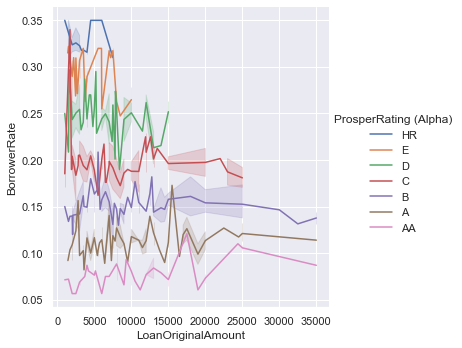

In [35]:
g = sns.relplot(x='LoanOriginalAmount', y='BorrowerRate', 
                data=loan_samp, hue='ProsperRating (Alpha)', kind='line')

Here we see the prosper rating. These charts clearly represent the relationship between Loan amount, interest rate, and their prosper rating. The higher your prosper rating, the better your loan interest rate is, with it slightly going down as you borrow more. 

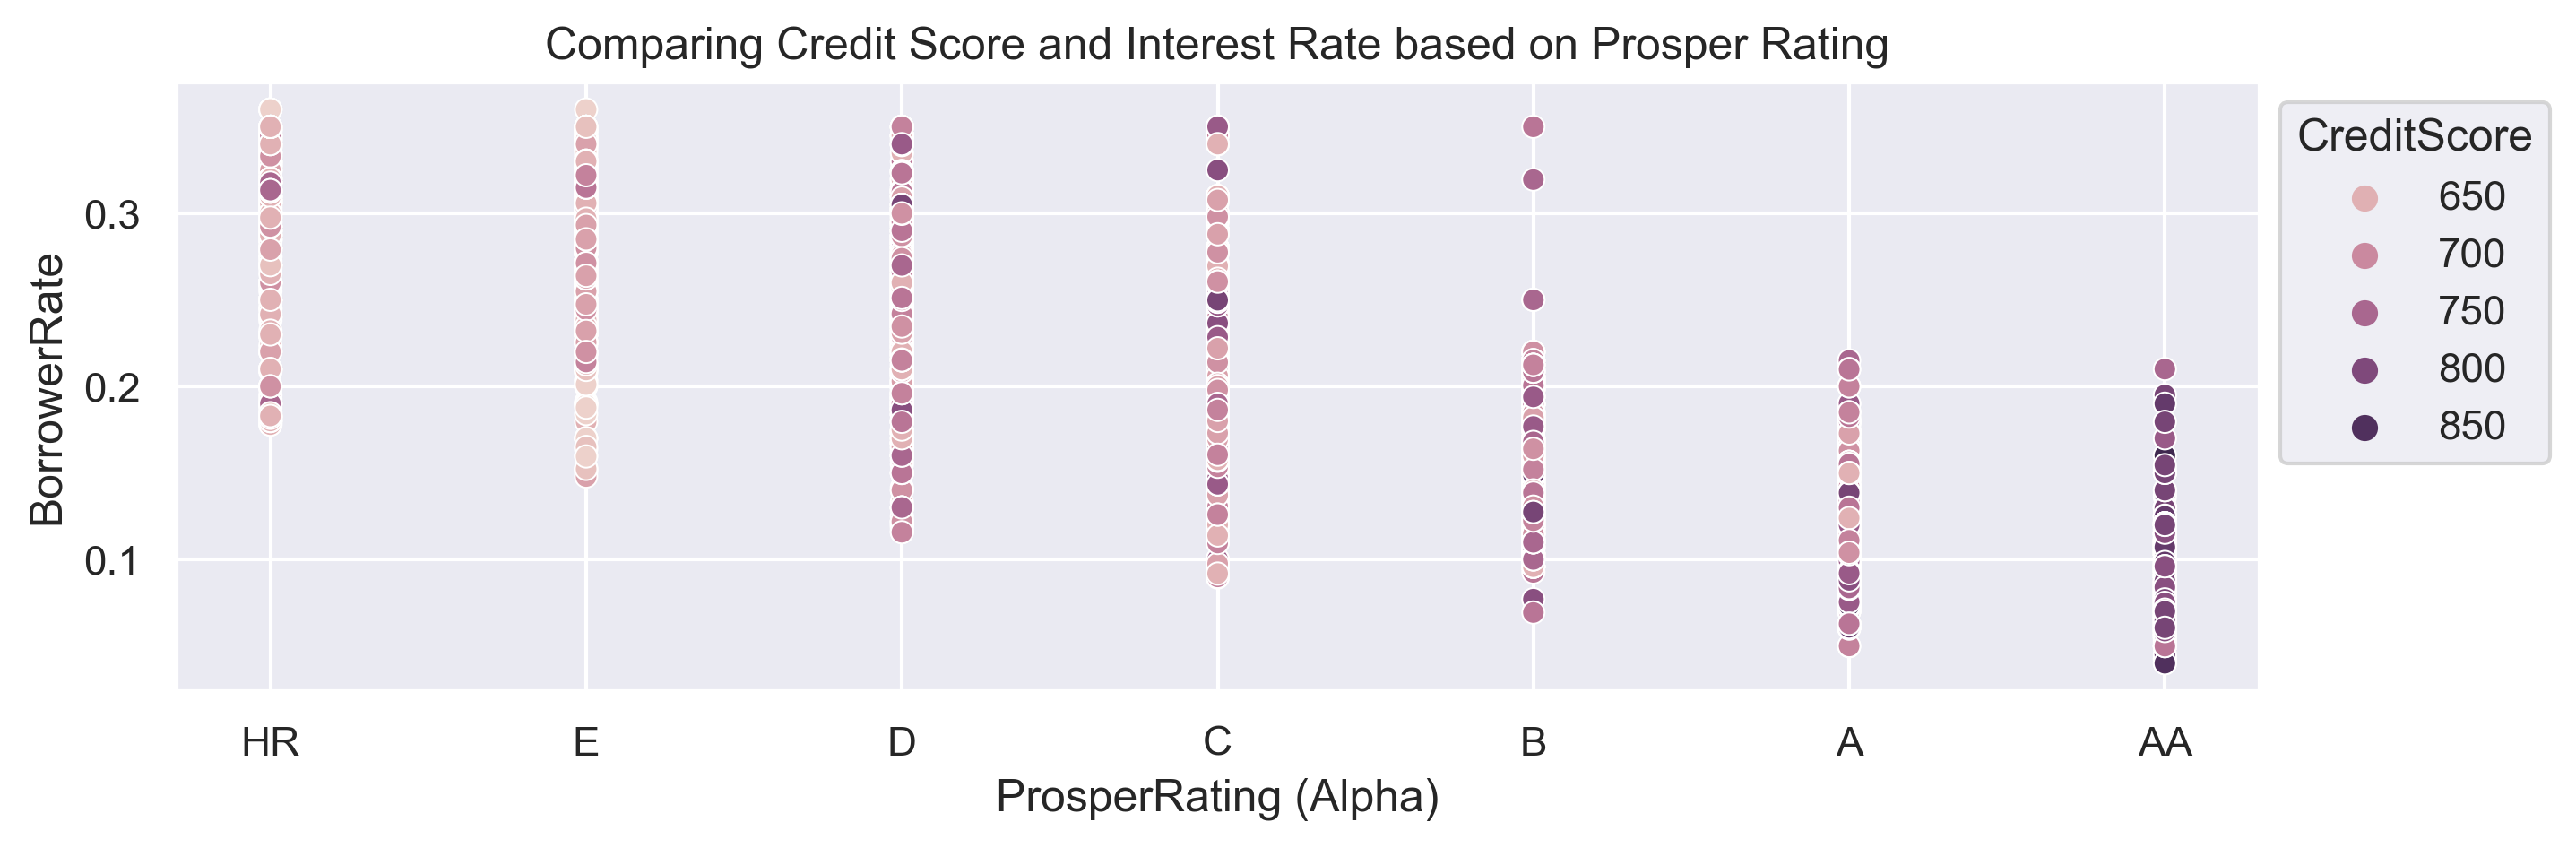

In [36]:
fig, ax = plt.subplots(1, 1, figsize=[10, 3], dpi=300)
sns.scatterplot(data=loans, x="ProsperRating (Alpha)", y="BorrowerRate", hue="CreditScore", ax=ax)
ax.set_title("Comparing Credit Score and Interest Rate based on Prosper Rating")
"""moving the legend to the left so it is not obscuring data"""
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1));

Here we see what credit score does to prosper rating, with a clear slope that indicates a higher credit score with a better prosper rating and interest rate. 

## Overall takeaways 

We see that there is a clear relationship between the interest rate (BorrowerRate) and several other factors. While the interest rate seems to be heavily grouped, we can distinguish clearly those groups by credit score, loan amount, and income which all impact their "Prosper Rating". 
We can also see:
* Although Credit Score is right skewed and Income is left skewed and unimodal, the interest rate is not, indicating that there are several things impacting your score. 
* However, Prosper Rating is unimodal and centralized. 
* Because interest rate is so clearly correlated to several other financial factors, it is interesting that there is no linear relationship with debt to income or the term limits. 
* To get the best prosper rating, it is clear that a large loan amount, high credit score, and high income will all impact your chances heavily. 